In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [41]:
df = pd.read_csv("data_season.csv")

In [54]:
df.describe

<bound method NDFrame.describe of       Year  Location   Area  Rainfall  Temperature  Soil type  Irrigation  \
0     2004         8   1279    2903.1         27.0          0           1   
1     2004         8  13283    2903.1         27.0          0           1   
2     2004         8  52119    2903.1         27.0          0           1   
3     2004         8    725    2996.6         27.0          0           1   
4     2004         8  12885    2996.6         27.0          0           1   
...    ...       ...    ...       ...          ...        ...         ...   
3153  2013         2  46990    3296.0         27.0          0           1   
3154  2014         2    103    3296.0         27.0          0           1   
3155  2015         2   8239    3550.0         27.0          0           1   
3156  2016         2  44563    3550.0         27.0          0           1   
3157  2017         2     96    3550.0         27.0          0           1   

        yeilds  Humidity  Crops   price  Season  
0       2570.0      57.0      5  200000       0  
1      27170.0      57.5      5    4847       0  
2     114744.0      57.0      5   51239       0  
3       1402.0      55.0      5  216396       0  
4      23456.0      56.0      5    2644       0  
...        ...       ...    ...     ...     ...  
3153  107809.0      53.5      5   51239       1  
3154    1132.0      52.5      5  216396       1  
3155   23960.0      56.0      5    2644       1  
3156  126487.0      57.0      5   44235       1  
3157     804.0      57.5      5  203317       1  

[3158 rows x 12 columns]>

In [55]:
df.columns

Index(['Year', 'Location', 'Area', 'Rainfall', 'Temperature', 'Soil type',
       'Irrigation', 'yeilds', 'Humidity', 'Crops', 'price', 'Season'],
      dtype='object')

In [42]:
print(df.isnull().sum())

Year            0
Location        0
Area            0
Rainfall        0
Temperature     0
Soil type      58
Irrigation      0
yeilds          0
Humidity        0
Crops           0
price           0
Season          0
dtype: int64


In [43]:
df['Soil type'] = df['Soil type'].fillna(df['Soil type'].mode()[0])


In [44]:
label_encoders = {}
for col in ['Location', 'Soil type', 'Irrigation', 'Season']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [45]:
le_crop = LabelEncoder()
df['Crops'] = le_crop.fit_transform(df['Crops'])


In [46]:
X = df.drop(columns=['Crops'])
y = df['Crops']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred = rf_model.predict(X_test)


In [50]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_crop.classes_))

Accuracy: 0.865506329113924

Classification Report:
               precision    recall  f1-score   support

    Arecanut       0.84      0.81      0.83        32
   Blackgram       1.00      0.74      0.85        31
    Cardamum       0.96      0.72      0.82        32
      Cashew       0.72      0.79      0.75        29
       Cocoa       1.00      0.44      0.62        18
     Coconut       0.87      0.99      0.92       290
      Coffee       0.76      0.79      0.78        39
      Cotton       0.80      0.57      0.67         7
      Ginger       0.91      0.87      0.89        46
   Groundnut       0.92      0.92      0.92        24
       Paddy       0.79      0.83      0.81        23
      Pepper       0.86      0.62      0.72        29
         Tea       0.96      0.72      0.82        32

    accuracy                           0.87       632
   macro avg       0.87      0.76      0.80       632
weighted avg       0.87      0.87      0.86       632



/tmp/ipython-input-2794944549.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


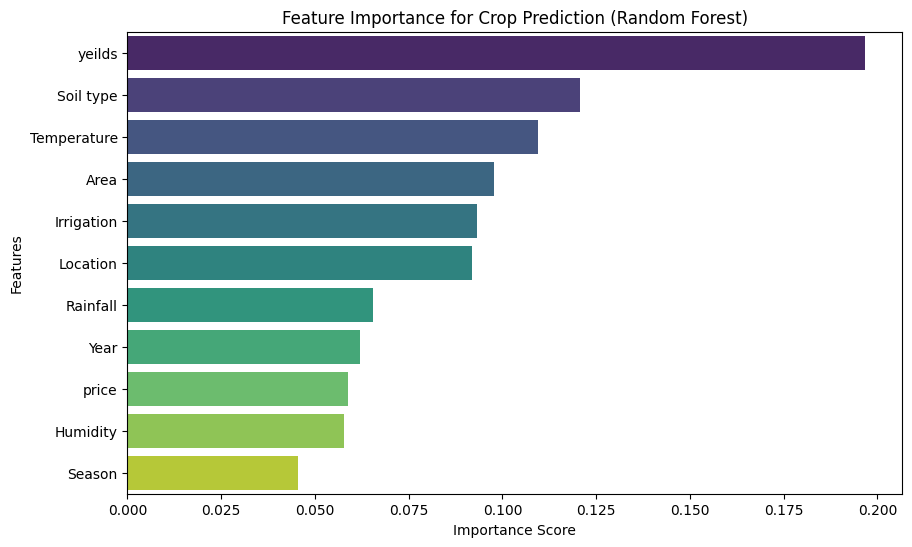

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
features = X.columns

indices = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importance for Crop Prediction (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [52]:
import pickle

with open("rf_crop_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)
with open("crop_label_encoder.pkl", "wb") as f:
    pickle.dump(le_crop, f)


In [53]:
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

with open("crop_label_encoder.pkl", "wb") as f:
    pickle.dump(le_crop, f)

with open("rf_crop_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)
